# BioImagePy: process execution

This tutorial descibe the use of the **BiProcess** class to run process. A process runable with the **BiProcess** class is a command line tool descibed by a *XML* file. The structure and content of a process *XML* file is not detailled in this tutorial. Please refer to the **BioImageIT** project documentation or to the **Galaxy Project** wrapper documentation to know more about *XML* process file or wrappers.

In this tutorial, we assume that we have the process `svdenoise2d` available. What we call a process here is a executable program and it associated *XML* wrapper.


## Setup the process

In [1]:
import sys

# this is an optional command to install BioImagePy from conda if you do not have yet installed BioIMagePy
#!conda install --yes --prefix {sys.prefix} /Users/sprigent/anaconda3/conda-bld/osx-64/bioimagepy-0.1.0-py37_0.tar.bz2

# this is an optional command to link BioImagePy from local directory
sys.path.append("../bioimagepy") # Change this path to the bioimagepy directory


In [2]:
from bioimagepy.process import BiProcess

# create an instance of BiProcess with an xml file
# TODO: change the xml file path with your local path
myprocess = BiProcess('../toolshed/svdeconv/wrappers/svdenoise2d.xml')
myprocess.man()

SV Denoise 2D : 
2D image denoising using sparse variation model

	             -i	               	    Input image
	-regularization	              7	Regularization parameter pow(2,-x)
	     -weighting	            0.5	Sparsity parameter: 0=sparse, 1=total variation
	        -method	             SV	         Method
	             -o	               	   Output image


The `man()` method prints a man page that describe the process. Thus we need to execute the `svdenoise` process with four parameters. With **BioImagePy** we can execute a process by two ways:
1. Execute on files
2. Execute on python data

In the following of this tutorial we descibe the two methods

## Execute on files with exec()

To execute the process we simply run the method exec with the parameters descibed in the `man()` method of the process:

In [3]:
import imageio

myprocess.exec('-i', 'synthetic_data/data/population1_001.tif', 
               '-o', 'population1_001_denoised.tif', 
               '-regularization', 2, 
               '-weighting', 0.1,
               '-method', 'SV') 

myoutput = imageio.imread('population1_001_denoised.tif')

cmd: /Users/sprigent/Documents/code/tuto/toolshed/svdeconv/wrappers/../bin/svdenoise2d -i synthetic_data/data/population1_001.tif -o population1_001_denoised.tif -regularization 2 -weighting 0.1 -method SV -niter 200


Lets visualize the output:

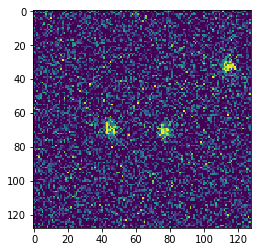

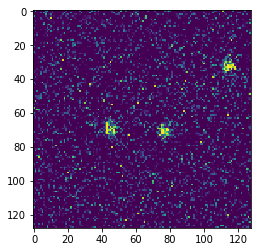

In [5]:
import matplotlib.pyplot as plt

plt.figure(1)                      
plt.imshow(imageio.imread('synthetic_data/data/population1_001.tif'))
plt.figure(2)
plt.imshow(myoutput)
plt.show()

This `exec()` method is usefull when we need to run a process on a list of data stored in a file system. Because, in this case, the data are not loaded into python variable but sent directly to the external process. 

## Execute on python data with run()

The `run()` method allows to run the process direcly on python data. It usage is similar to `exec()` except that the ouptut data are returned.

cmd:  ../bin/svdenoise2d -i /var/folders/zp/myl3mpgj7wz86g97mh_5wtsr0000gq/T/-i.tif -regularization 1 -weighting 0.1 -method SV -niter 200 -o /var/folders/zp/myl3mpgj7wz86g97mh_5wtsr0000gq/T/-o.tif


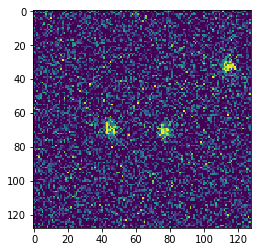

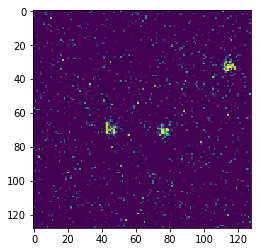

In [7]:
import matplotlib.pyplot as plt

# load an image
input_image = imageio.imread('synthetic_data/data/population1_001.tif')

# run the process
output_image = myprocess.run('-i', input_image,
               '-regularization', 1, 
               '-weighting', 0.1,
               '-method', 'SV') 

# visualize the images
plt.figure(1)                      
plt.imshow(input_image)
plt.figure(2)
plt.imshow(output_image)
plt.show()

The run process prints the executed command. As we can see, the input the output images are saved in the temporary directory to send them to the process. The advantage of the `run()` method is that we do not need to write code to send the data to the process (files saving and loading) and can just send the data to the process as if it where a native python function.

## Wrapping up

In this short tutorial, we saw the basic usage of **BiProcess** class. Basically we need to know 3 methods
1. `man`: to get the list of the process I/O and parameters
2. `exec`: to execute the process on files
3. `run`: to execute the process on data stored in python variables

This **BiProcess** class is a single data level processing. To run a process on an experiment dataset, we use the **BiProcessRunner** in the next tutorial